In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/laptop.csv')
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X.drop(columns=["Unnamed: 0","Unnamed: 0.1"],inplace=True)
print(X.columns)

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')


In [ ]:
X_Train,X_Test,y_Train,y_Test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_Train.head())
print(X_Train["Inches"].unique())

     Company   TypeName Inches                               ScreenResolution  \
10        HP   Notebook   15.6                                       1366x768   
147     Asus   Notebook   15.6                              Full HD 1920x1080   
1287      HP   Notebook   15.6                                       1366x768   
767     Dell     Gaming   15.6  IPS Panel Touchscreen / 4K Ultra HD 3840x2160   
816    Razer  Ultrabook   12.5  IPS Panel 4K Ultra HD / Touchscreen 3840x2160   

                                       Cpu   Ram                Memory  \
10              Intel Core i5 7200U 2.5GHz   4GB             500GB HDD   
147   Intel Celeron Dual Core N3350 1.1GHz   4GB               1TB HDD   
1287            Intel Core i7 6500U 2.5GHz   6GB               1TB HDD   
767            Intel Core i7 6700HQ 2.6GHz  16GB  128GB SSD +  1TB HDD   
816             Intel Core i7 7500U 2.5GHz  16GB             512GB SSD   

                          Gpu       OpSys  Weight  
10      Intel HD

In [ ]:
#Let's create a preprocessing pipeline for this dataset :
# Of which involves:
# We should be removing all kinds of null values and log transforming the prices of the corresponding data rows along with handling duplicates
# as well.
# Label encoding the companies, converting weight and inches columns to type float and remove kg and Gb from the ends of values of these columns
# Lets label encode the opsys as well similiar to the process used for encoding comapnies
# and lets clean the column of cpu by splitting it into the 2 columns : {Company+Brand},{frequency} .
# Similiarly lets clean the ScreenResolution to split into type_of_display and resolution_of_display columns.
# We can now only extract the part of gpu with company and brand of product or just company
# Memory can be split into both memory_size and memory_type


In [ ]:
#Start by observing null and duplicate values
X_total=pd.concat([X_Train,y_Train],axis=1)
X_total_test=pd.concat([X_Test,y_Test],axis=1)
print(X_total.columns)
print(f"Columnwise null values in :{X_total.isna().sum()}")
print(f"Number of Duplicates in Train Set:{X_total.duplicated().sum()}")
print(f"Columnwise null values in :{X_total_test.isna().sum()}")
print(f"Number of Duplicates in Test Set:{X_total_test.duplicated().sum()}")
X_total.dropna(inplace=True)
X_total.drop_duplicates(inplace=True)
X_total_test.dropna(inplace=True)
X_total_test.drop_duplicates(inplace=True)
print(f"Columnwise null values in :{X_total.isna().sum()}")
print(f"Number of Duplicates in Train Set:{X_total.duplicated().sum()}")
print(f"Columnwise null values in :{X_total_test.isna().sum()}")
print(f"Number of Duplicates in Test Set:{X_total_test.duplicated().sum()}")

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')
Columnwise null values in :Company             23
TypeName            23
Inches              23
ScreenResolution    23
Cpu                 23
Ram                 23
Memory              23
Gpu                 23
OpSys               23
Weight              23
Price               23
dtype: int64
Number of Duplicates in Train Set:41
Columnwise null values in :Company             7
TypeName            7
Inches              7
ScreenResolution    7
Cpu                 7
Ram                 7
Memory              7
Gpu                 7
OpSys               7
Weight              7
Price               7
dtype: int64
Number of Duplicates in Test Set:9
Columnwise null values in :Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
O

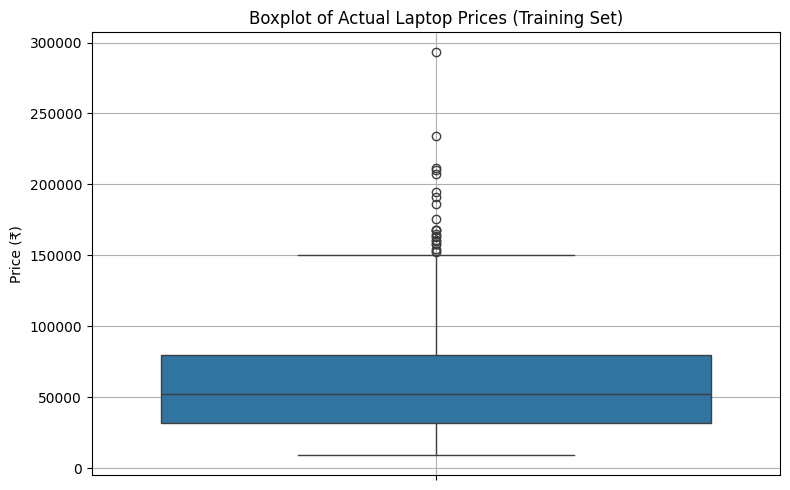

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert y_train to a DataFrame
df_train = pd.DataFrame({'Price': y_Train})

plt.figure(figsize=(8, 5))
sns.boxplot(y="Price", data=df_train)
plt.title("Boxplot of Actual Laptop Prices (Training Set)")
plt.ylabel("Price (₹)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
X_train=X_total.iloc[:,:-1]
y_train=X_total.iloc[:,-1]
X_test=X_total_test.iloc[:,:-1]
y_test=X_total_test.iloc[:,-1]
#Applying log transfrom onto the price column of the dataset to compress outliers to a range of values
print(len(X_train),len(y_train))
y_train=np.log1p(y_train)
print(X_train.head())

1000 1000
     Company   TypeName Inches                               ScreenResolution  \
10        HP   Notebook   15.6                                       1366x768   
147     Asus   Notebook   15.6                              Full HD 1920x1080   
1287      HP   Notebook   15.6                                       1366x768   
767     Dell     Gaming   15.6  IPS Panel Touchscreen / 4K Ultra HD 3840x2160   
816    Razer  Ultrabook   12.5  IPS Panel 4K Ultra HD / Touchscreen 3840x2160   

                                       Cpu   Ram                Memory  \
10              Intel Core i5 7200U 2.5GHz   4GB             500GB HDD   
147   Intel Celeron Dual Core N3350 1.1GHz   4GB               1TB HDD   
1287            Intel Core i7 6500U 2.5GHz   6GB               1TB HDD   
767            Intel Core i7 6700HQ 2.6GHz  16GB  128GB SSD +  1TB HDD   
816             Intel Core i7 7500U 2.5GHz  16GB             512GB SSD   

                          Gpu       OpSys  Weight  
10    

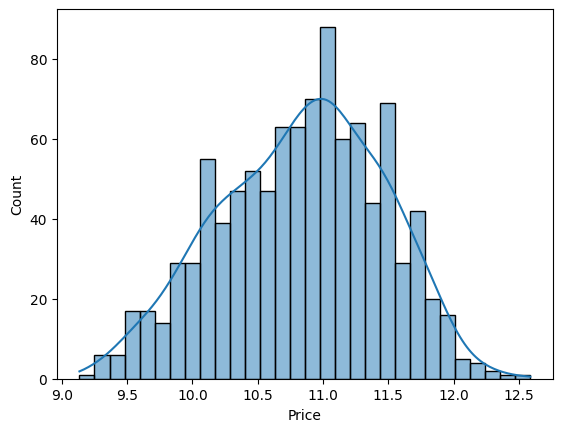

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(y_train, bins=30, kde=True)
# sns.boxplot(y_train)
# plt.title("Distribution of Laptop Prices (Training Set)")
# plt.xlabel("Price (₹)")
# plt.ylabel("Frequency")
# plt.grid(True)
plt.show()

In [ ]:
#From the above histplot it is clearly visible that most of the laptop prices have successfully been compressed into this range of values.
import numpy as np
#Now lets clean the RAM and weight columns of the units
X_train["Ram"]=X_train["Ram"].str.replace('GB','',regex=False).astype(int)
X_train["Weight"]=X_train["Weight"].str.replace('kg','',regex=False).astype(np.float32)
X_test["Ram"]=X_test["Ram"].str.replace('GB','',regex=False).astype(int)
X_test["Weight"] = X_test["Weight"].str.replace('?', '', regex=False).str.replace('kg', '', regex=False).str.strip().replace('', np.nan).astype(np.float32)
print(f"Columnwise null values in :{y_train.isna().sum()}")
print(f"Number of Duplicates in Train Set:{X_train.duplicated().sum()}")
print(f"Columnwise null values in :{X_total_test.isna().sum()}")
print(f"Number of Duplicates in Test Set:{X_total_test.duplicated().sum()}")
print(X_train.head())
print(len(X_train),len(y_train))


Columnwise null values in :0
Number of Duplicates in Train Set:22
Columnwise null values in :Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64
Number of Duplicates in Test Set:0
     Company   TypeName Inches                               ScreenResolution  \
10        HP   Notebook   15.6                                       1366x768   
147     Asus   Notebook   15.6                              Full HD 1920x1080   
1287      HP   Notebook   15.6                                       1366x768   
767     Dell     Gaming   15.6  IPS Panel Touchscreen / 4K Ultra HD 3840x2160   
816    Razer  Ultrabook   12.5  IPS Panel 4K Ultra HD / Touchscreen 3840x2160   

                                       Cpu  Ram                Memory  \
10              Intel Core i5 7200U 2.5GHz    4          

In [ ]:
import pandas as pd
import numpy as np

def process_cpu(df, cpu_column="Cpu"):
    # Initialize new columns
    df["CPU_Brand"] = np.nan
    df["CPU_Model"] = np.nan
    df["CPU_Generation"] = np.nan
    df["CPU_Suffix"] = np.nan
    df["CPU_Clock_Speed"] = np.nan

    for idx, cpu in df[cpu_column].items():
        if not isinstance(cpu, str):
            continue
        tokens = cpu.split()

        # Extract Brand (first token, usually Intel or AMD)
        if tokens:
            df.at[idx, "CPU_Brand"] = tokens[0]

        # Extract Model Line (e.g., Core i5, Ryzen 7)
        if "Intel" in cpu:
            if "Core" in cpu:
                model_idx = tokens.index("Core") + 2  # e.g., ["Intel", "Core", "i5"]
                df.at[idx, "CPU_Model"] = " ".join(tokens[tokens.index("Core"):model_idx])
            elif "Celeron" in cpu or "Pentium" in cpu or "Atom" in cpu:
                df.at[idx, "CPU_Model"] = tokens[1]
        elif "AMD" in cpu:
            if "Ryzen" in cpu:
                model_idx = tokens.index("Ryzen") + 2  # e.g., ["AMD", "Ryzen", "5"]
                df.at[idx, "CPU_Model"] = " ".join(tokens[tokens.index("Ryzen"):model_idx])
            else:
                df.at[idx, "CPU_Model"] = tokens[1]

        # Extract Generation and Suffix (e.g., 7200U → Gen 7, Suffix U)
        for token in tokens:
            if any(char.isdigit() for char in token) and any(char.isalpha() for char in token):
                # Assume token like "7200U"
                digits = "".join([c for c in token if c.isdigit()])
                letters = "".join([c for c in token if c.isalpha()])
                if digits:
                    # Take first 1-2 digits as generation
                    df.at[idx, "CPU_Generation"] = float(digits[:2 if digits.startswith("1") else 1])
                if letters:
                    df.at[idx, "CPU_Suffix"] = letters
                break

        # Extract Clock Speed (e.g., 2.5GHz)
        for token in tokens:
            if "GHz" in token:
                try:
                    df.at[idx, "CPU_Clock_Speed"] = float(token.replace("GHz", ""))
                except ValueError:
                    pass
                break

    return df
X_train =process_cpu(X_train)
X_test=process_cpu(X_test)

<ipython-input-11-3955057060>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Intel' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "CPU_Brand"] = tokens[0]
<ipython-input-11-3955057060>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Core i5' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "CPU_Model"] = " ".join(tokens[tokens.index("Core"):model_idx])
<ipython-input-11-3955057060>:45: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'i' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "CPU_Suffix"] = letters
<ipython-input-11-3955057060>:19: FutureWarning: Setting an item of incom

In [ ]:
# print(X_train_copy.head())
X_train.drop(columns=["Cpu"],inplace=True)
X_test.drop(columns=["Cpu"],inplace=True)
print(X_test.columns)
print(X_train.columns)
# print(X_train_copy["CPU_Brand"].isna().sum())
# print(X_train_copy["CPU_Model"].isna().sum())
# print(X_train_copy["CPU_Generation"].isna().sum())
# print(X_train_copy["CPU_Suffix"].isna().sum())
# print(X_train_copy["CPU_Clock_Speed"].isna().sum())

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'CPU_Brand', 'CPU_Model', 'CPU_Generation',
       'CPU_Suffix', 'CPU_Clock_Speed'],
      dtype='object')
Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory',
       'Gpu', 'OpSys', 'Weight', 'CPU_Brand', 'CPU_Model', 'CPU_Generation',
       'CPU_Suffix', 'CPU_Clock_Speed'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np

def process_gpu(df, gpu_column="Gpu"):
    # Initialize new columns
    df["GPU_Brand"] = np.nan
    df["GPU_Series"] = np.nan
    df["GPU_Model_Number"] = 0.0
    df["GPU_VRAM"] = 0.0

    for idx, gpu in df[gpu_column].items():
        if not isinstance(gpu, str):
            continue
        tokens = gpu.split()
        #Here we are extracting brand from string
        if tokens:
            brand = tokens[0]
            if brand in ['Intel', 'AMD', 'Nvidia', 'ARM']:
                df.at[idx, "GPU_Brand"] = brand
            else:
                df.at[idx, "GPU_Brand"] = "Other"

        # Here we are extracting series from string
        if brand == "Intel":
            if "HD Graphics" in gpu:
                df.at[idx, "GPU_Series"] = "HD Graphics"
            elif "Iris" in gpu:
                df.at[idx, "GPU_Series"] = "Iris" + (" Xe" if "Xe" in gpu else "")
            elif "UHD Graphics" in gpu:
                df.at[idx, "GPU_Series"] = "UHD Graphics"
            else:
                df.at[idx, "GPU_Series"] = tokens[1] if len(tokens) > 1 else "Unknown"
        elif brand == "Nvidia":
            if "GeForce" in gpu:
                start_idx = tokens.index("GeForce")
                series_end = start_idx + 3 if "GTX" in gpu or "RTX" in gpu else start_idx + 2
                df.at[idx, "GPU_Series"] = " ".join(tokens[start_idx:series_end])
            else:
                df.at[idx, "GPU_Series"] = tokens[1] if len(tokens) > 1 else "Unknown"
        elif brand == "AMD":
            if "Radeon" in gpu:
                start_idx = tokens.index("Radeon")
                series_end = start_idx + 3 if "RX" in gpu else start_idx + 2
                df.at[idx, "GPU_Series"] = " ".join(tokens[start_idx:series_end])
            else:
                df.at[idx, "GPU_Series"] = tokens[1] if len(tokens) > 1 else "Unknown"
        elif brand == "ARM":
            if "Mali" in gpu:
                df.at[idx, "GPU_Series"] = tokens[1] if len(tokens) > 1 else "Mali"
            else:
                df.at[idx, "GPU_Series"] = tokens[1] if len(tokens) > 1 else "Unknown"

        # Extract Model Number (first numeric token)
        for token in tokens:
            if token.isdigit():
                df.at[idx, "GPU_Model_Number"] = float(token)
                break

        # Extract VRAM (token with "GB")
        for token in tokens:
            if "GB" in token:
                try:
                    df.at[idx, "GPU_VRAM"] = float(token.replace("GB", ""))
                except ValueError:
                    pass
                break

    return df

In [ ]:
X_test = process_gpu(X_test)
X_train = process_gpu(X_train)
X_train.drop(columns=["Gpu"],inplace=True)
X_test.drop(columns=["Gpu"],inplace=True)
print(X_test.columns)
print(X_train.columns)
print(X_train["GPU_Brand"].isna().sum())
print(X_train["GPU_Series"].isna().sum())
print(X_train["GPU_Model_Number"].isna().sum())
print(X_train["GPU_VRAM"].isna().sum())
print(X_train.head())
print(X_train["GPU_Series"].unique())

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory',
       'OpSys', 'Weight', 'CPU_Brand', 'CPU_Model', 'CPU_Generation',
       'CPU_Suffix', 'CPU_Clock_Speed', 'GPU_Brand', 'GPU_Series',
       'GPU_Model_Number', 'GPU_VRAM'],
      dtype='object')
Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'Memory',
       'OpSys', 'Weight', 'CPU_Brand', 'CPU_Model', 'CPU_Generation',
       'CPU_Suffix', 'CPU_Clock_Speed', 'GPU_Brand', 'GPU_Series',
       'GPU_Model_Number', 'GPU_VRAM'],
      dtype='object')
0
0
0
0
     Company   TypeName Inches                               ScreenResolution  \
10        HP   Notebook   15.6                                       1366x768   
147     Asus   Notebook   15.6                              Full HD 1920x1080   
1287      HP   Notebook   15.6                                       1366x768   
767     Dell     Gaming   15.6  IPS Panel Touchscreen / 4K Ultra HD 3840x2160   
816    Razer  Ultrabook   12.5  IPS

<ipython-input-13-333107744>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Intel' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "GPU_Brand"] = brand
<ipython-input-13-333107744>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'HD Graphics' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "GPU_Series"] = "HD Graphics"
<ipython-input-13-333107744>:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Intel' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "GPU_Brand"] = brand
<ipython-input-13-333107744>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will 

In [ ]:
X_train.drop(columns=["GPU_VRAM"],inplace=True)
X_test.drop(columns=["GPU_VRAM"],inplace=True)

In [ ]:
# Impute missing CPU_Model
X_train["CPU_Model"] = X_train["CPU_Model"].fillna("Unknown")
X_test["CPU_Model"] = X_test["CPU_Model"].fillna("Unknown")
X_test["Weight"]=X_test["Weight"].fillna(X_test["Weight"].mean())
print(X_train.isna().sum())
print(X_test.isna().sum())

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Ram                 0
Memory              0
OpSys               0
Weight              0
CPU_Brand           0
CPU_Model           0
CPU_Generation      0
CPU_Suffix          0
CPU_Clock_Speed     0
GPU_Brand           0
GPU_Series          0
GPU_Model_Number    0
dtype: int64
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Ram                 0
Memory              0
OpSys               0
Weight              0
CPU_Brand           0
CPU_Model           0
CPU_Generation      0
CPU_Suffix          0
CPU_Clock_Speed     0
GPU_Brand           0
GPU_Series          0
GPU_Model_Number    0
dtype: int64


In [ ]:
def process_memory(df, memory_column="Memory"):
    df["Total_Capacity_GB"] = 0.0
    df["Primary_Type"] = np.nan
    df["SSD_Capacity_GB"] = 0.0
    df["HDD_Capacity_GB"] = 0.0
    df["Is_Hybrid"] = 0
    for idx, memory in df[memory_column].items():
        if not isinstance(memory, str):
            continue
        memory = memory.strip()
        drives = memory.split(" + ")
        total_capacity = 0.0
        ssd_capacity = 0.0
        hdd_capacity = 0.0
        primary_type = None
        for drive in drives:
            drive = drive.strip()
            capacity = 0.0
            if "TB" in drive:
                capacity = float(drive.split("TB")[0].strip()) * 1000
            elif "GB" in drive:
                capacity = float(drive.split("GB")[0].strip())
            if "SSD" in drive:
                ssd_capacity += capacity
                if not primary_type:
                    primary_type = "SSD"
            elif "HDD" in drive:
                hdd_capacity += capacity
                if not primary_type:
                    primary_type = "HDD"
            total_capacity += capacity
        if len(drives) > 1:
            df.at[idx, "Is_Hybrid"] = 1
            primary_type = "Hybrid" if ssd_capacity > 0 and hdd_capacity > 0 else primary_type
        df.at[idx, "Total_Capacity_GB"] = total_capacity
        df.at[idx, "Primary_Type"] = primary_type or "Unknown"
        df.at[idx, "SSD_Capacity_GB"] = ssd_capacity
        df.at[idx, "HDD_Capacity_GB"] = hdd_capacity
    df.drop(columns=[memory_column],inplace=True)
    return df

X_train=process_memory(X_train)
X_test = process_memory(X_test)
print(X_train.head())
print(X_train.isna().sum())
print(X_test.isna().sum())
print(X_train.columns)
print(X_test.columns)

<ipython-input-17-3172032745>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'HDD' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "Primary_Type"] = primary_type or "Unknown"
<ipython-input-17-3172032745>:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'SSD' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.at[idx, "Primary_Type"] = primary_type or "Unknown"


     Company   TypeName Inches                               ScreenResolution  \
10        HP   Notebook   15.6                                       1366x768   
147     Asus   Notebook   15.6                              Full HD 1920x1080   
1287      HP   Notebook   15.6                                       1366x768   
767     Dell     Gaming   15.6  IPS Panel Touchscreen / 4K Ultra HD 3840x2160   
816    Razer  Ultrabook   12.5  IPS Panel 4K Ultra HD / Touchscreen 3840x2160   

      Ram       OpSys  Weight CPU_Brand   CPU_Model  CPU_Generation  \
10      4       No OS    1.86     Intel     Core i5             5.0   
147     4  Windows 10    2.00     Intel  Core N3350             3.0   
1287    6  Windows 10    2.19     Intel     Core i7             7.0   
767    16  Windows 10    2.72     Intel     Core i7             7.0   
816    16  Windows 10    1.29     Intel     Core i7             7.0   

     CPU_Suffix  CPU_Clock_Speed GPU_Brand        GPU_Series  \
10            i       

In [ ]:
#Lets remove the companies
# Define the companies to group under 'Rare Companies'
companies_to_group = ["Google", "Chuwi", "Fujitsu", "Huawei", "LG", "Mediacom", "Microsoft", "Vero", "Xiaomi"]

# Replace the specified companies with 'Rare Companies' in the 'Company' column
X_train["Company"] = X_train["Company"].apply(lambda x: "Rare Companies" if x in companies_to_group else x)
X_test["Company"] = X_test["Company"].apply(lambda x: "Rare Companies" if x in companies_to_group else x)

# Optional: Verify the unique companies after grouping
print(X_test["Company"].unique())
print(len(X_train),len(y_train))
print(X_train['OpSys'].unique())

['Toshiba' 'HP' 'Lenovo' 'Dell' 'Asus' 'Samsung' 'MSI' 'Rare Companies'
 'Acer' 'Apple' 'Razer']
1000 1000
['No OS' 'Windows 10' 'Chrome OS' 'Windows 7' 'Mac OS X' 'Linux'
 'Windows 10 S' 'macOS' 'Android']


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def feature_1_and_2_categorical(feature_1, feature_2):

    X_train_1 = X_train[[feature_1, feature_2]].copy()
    y_train_1 = y_train.copy()

    combo_col = f"{feature_1}+{feature_2}"
    X_train_1[combo_col] = X_train_1[feature_1].astype(str) + " " + X_train_1[feature_2].astype(str)

    combo_counts = X_train_1[combo_col].value_counts()
    valid_combos = combo_counts[combo_counts >= 5].index
    X_train_1[combo_col] = X_train_1[combo_col].apply(lambda x: x if x in valid_combos else 'Other')

    X_train_total = pd.concat([X_train_1, y_train_1], axis=1)

    X_encoded = pd.get_dummies(X_train_total[[feature_1, feature_2, combo_col]])
    X_encoded["Price"] = y_train_1.reset_index(drop=True)

    corr_matrix = X_encoded.corr()

    relevant_cols = [col for col in X_encoded.columns if feature_1 in col or feature_2 in col or combo_col in col or col == "Price"]
    corr_subset = X_encoded[relevant_cols].corr()

    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_subset, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Matrix: {feature_1}, {feature_2}, and {combo_col}")
    plt.tight_layout()
    plt.show()
    last_col = corr_matrix.columns[-1]
    corr_with_target = corr_matrix[last_col].drop(last_col).sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")
    plt.title(f"Correlation of Features with {last_col}")
    plt.xlabel("Correlation")
    plt.ylabel("Features")
    plt.tight_layout()
    plt.show()
    return corr_subset


In [ ]:
# feature_1_and_2_categorical("Company","TypeName")
X_train.columns

Index(['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Ram', 'OpSys',
       'Weight', 'CPU_Brand', 'CPU_Model', 'CPU_Generation', 'CPU_Suffix',
       'CPU_Clock_Speed', 'GPU_Brand', 'GPU_Series', 'GPU_Model_Number',
       'Total_Capacity_GB', 'Primary_Type', 'SSD_Capacity_GB',
       'HDD_Capacity_GB', 'Is_Hybrid'],
      dtype='object')

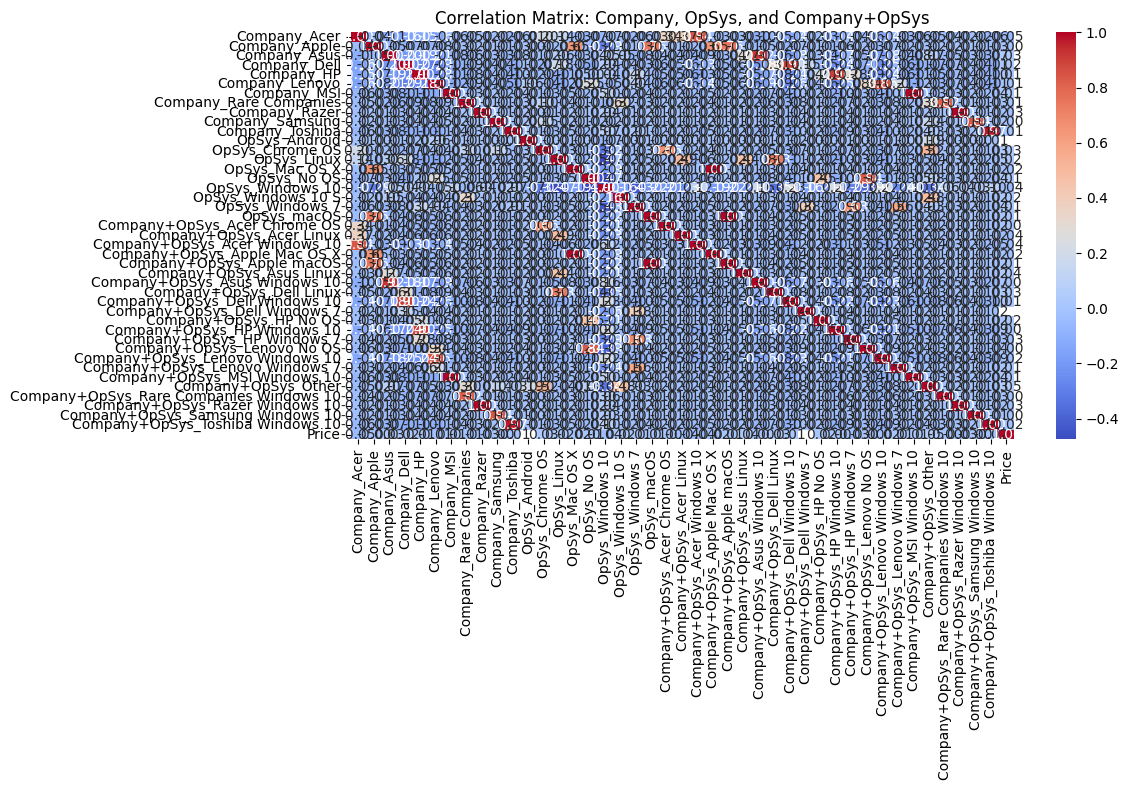

<ipython-input-19-610817791>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_with_target.values, y=corr_with_target.index, palette="viridis")


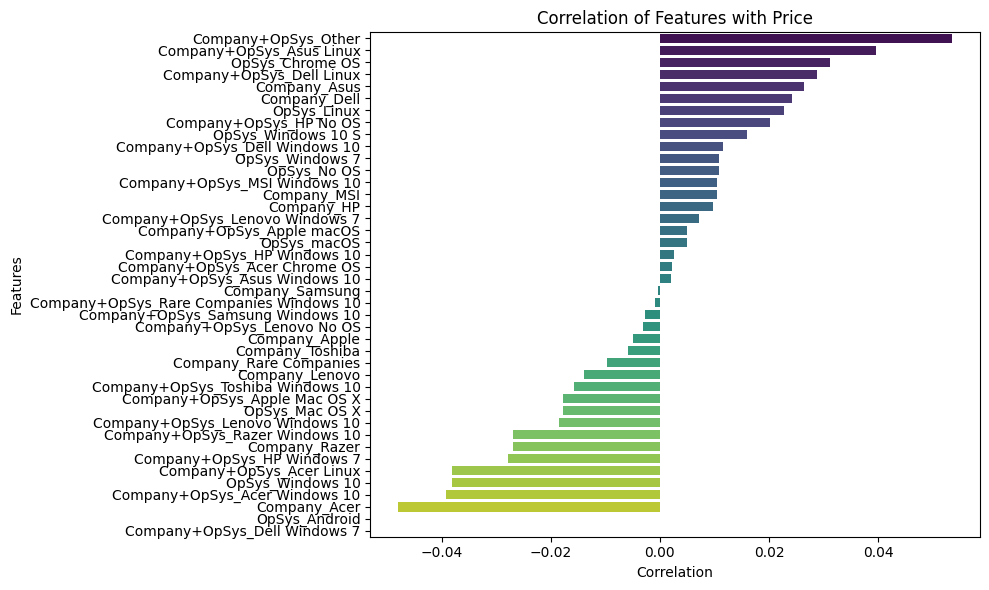

,Company_Acer,Company_Apple,Company_Asus,Company_Dell,Company_HP,Company_Lenovo,Company_MSI,Company_Rare Companies,Company_Razer,Company_Samsung,...,Company+OpSys_Lenovo No OS,Company+OpSys_Lenovo Windows 10,Company+OpSys_Lenovo Windows 7,Company+OpSys_MSI Windows 10,Company+OpSys_Other,Company+OpSys_Rare Companies Windows 10,Company+OpSys_Razer Windows 10,Company+OpSys_Samsung Windows 10,Company+OpSys_Toshiba Windows 10,Price
Company_Acer,1.000000,-0.041317,-0.111183,-0.158129,-0.149832,-0.163173,-0.062931,-0.047539,-0.023066,-0.024926,...,-0.055697,-0.139567,-0.034072,-0.062931,-0.048506,-0.039042,-0.023066,-0.021045,-0.059005,-0.048001
Company_Apple,-0.041317,1.000000,-0.052119,-0.074126,-0.070236,-0.076490,-0.029500,-0.022285,-0.010812,-0.011685,...,-0.026109,-0.065424,-0.015972,-0.029500,-0.022738,-0.018302,-0.010812,-0.009865,-0.027660,-0.004903
Company_Asus,-0.111183,-0.052119,1.000000,-0.199471,-0.189004,-0.205834,-0.079384,-0.059968,-0.029096,-0.031443,...,-0.070259,-0.176056,-0.042980,-0.079384,0.072743,-0.049249,-0.029096,-0.026548,-0.074432,0.026366
Company_Dell,-0.158129,-0.074126,-0.199471,1.000000,-0.268811,-0.292746,-0.112903,-0.085289,-0.041382,-0.044720,...,-0.099926,-0.250394,-0.061128,-0.112903,-0.071878,-0.070045,-0.041382,-0.037757,-0.105860,0.024247
Company_HP,-0.149832,-0.070236,-0.189004,-0.268811,1.000000,-0.277385,-0.106979,-0.080814,-0.039210,-0.042373,...,-0.094683,-0.237255,-0.057920,-0.106979,-0.051211,-0.066369,-0.039210,-0.035776,-0.100305,0.009664
Company_Lenovo,-0.163173,-0.076490,-0.205834,-0.292746,-0.277385,1.000000,-0.116504,-0.088010,-0.042702,-0.046146,...,0.341340,0.855330,0.208809,-0.116504,-0.030251,-0.072279,-0.042702,-0.038962,-0.109236,-0.013828
Company_MSI,-0.062931,-0.029500,-0.079384,-0.112903,-0.106979,-0.116504,1.000000,-0.033943,-0.016469,-0.017797,...,-0.039768,-0.099650,-0.024327,1.000000,-0.034633,-0.027876,-0.016469,-0.015026,-0.042129,0.010431
Company_Rare Companies,-0.047539,-0.022285,-0.059968,-0.085289,-0.080814,-0.088010,-0.033943,1.000000,-0.012441,-0.013444,...,-0.030041,-0.075277,-0.018377,-0.033943,0.295835,0.821259,-0.012441,-0.011351,-0.031825,-0.009733
Company_Razer,-0.023066,-0.010812,-0.029096,-0.041382,-0.039210,-0.042702,-0.016469,-0.012441,1.000000,-0.006523,...,-0.014576,-0.036524,-0.008917,-0.016469,-0.012694,-0.010217,1.000000,-0.005508,-0.015441,-0.026891
Company_Samsung,-0.024926,-0.011685,-0.031443,-0.044720,-0.042373,-0.046146,-0.017797,-0.013444,-0.006523,1.000000,...,-0.015752,-0.039470,-0.009636,-0.017797,0.137026,-0.011041,-0.006523,0.844304,-0.016687,-0.000257


In [ ]:
feature_1_and_2_categorical("Company","OpSys")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def process_screen_resolution(df):
    # Extract resolution (last element after splitting) and display type (all but last)
    df["Resolution"] = df["ScreenResolution"].apply(lambda x: x.split()[-1] if isinstance(x, str) else np.nan)
    df["DisplayType"] = df["ScreenResolution"].apply(lambda x: ' '.join(x.split()[:-1]) if isinstance(x, str) and len(x.split()) > 1 else 'Unknown')

    # Extract width and height from resolution
    df[["Resolution_Width", "Resolution_Height"]] = df["Resolution"].str.extract(r'(\d+)x(\d+)').astype(float, errors='ignore')

    # Drop original and temporary columns
    df = df.drop(columns=["ScreenResolution", "Resolution"], errors='ignore')
    return df

# Ensure index alignment for X_train, y_train, X_test, y_test
X_train = X_train.copy()
y_train = y_train.copy()
X_train.index = y_train.index  # Align indices
X_test = X_test.copy()
y_test = y_test.copy()
X_test.index = y_test.index  # Align indices

# Apply resolution and display processing
X_train = process_screen_resolution(X_train)
X_test = process_screen_resolution(X_test)

# Convert Inches to numeric and drop rows with missing Inches
X_train["Inches"] = pd.to_numeric(X_train["Inches"], errors='coerce')
X_test["Inches"] = pd.to_numeric(X_test["Inches"], errors='coerce')

# Store indices of non-NaN rows
train_valid_indices = X_train["Inches"].notna() & X_train["Resolution_Width"].notna() & X_train["Resolution_Height"].notna()
test_valid_indices = X_test["Inches"].notna() & X_test["Resolution_Width"].notna() & X_test["Resolution_Height"].notna()

# Filter X_train, y_train, X_test, y_test
X_train = X_train[train_valid_indices].reset_index(drop=True)
y_train = y_train[train_valid_indices].reset_index(drop=True)
X_test = X_test[test_valid_indices].reset_index(drop=True)
y_test = y_test[test_valid_indices].reset_index(drop=True)

# Filter out zero Inches to avoid division errors in PPI
X_train = X_train[X_train["Inches"] != 0].reset_index(drop=True)
y_train = y_train.loc[X_train.index].reset_index(drop=True)
X_test = X_test[X_test["Inches"] != 0].reset_index(drop=True)
y_test = y_test.loc[X_test.index].reset_index(drop=True)

# Compute PPI
X_train["PPI"] = np.sqrt(X_train["Resolution_Width"]**2 + X_train["Resolution_Height"]**2) / X_train["Inches"]
X_test["PPI"] = np.sqrt(X_test["Resolution_Width"]**2 + X_test["Resolution_Height"]**2) / X_test["Inches"]

# Drop intermediate resolution columns
X_train = X_train.drop(columns=["Resolution_Width", "Resolution_Height"], errors='ignore')
X_test = X_test.drop(columns=["Resolution_Width", "Resolution_Height"], errors='ignore')

display_counts = X_train["DisplayType"].value_counts()
labels = display_counts.index.tolist()
data = display_counts.values.tolist()
print(display_counts)
X_train["DisplayType"]
X_test["DisplayType"]=X_test["DisplayType"].astype(str)

DisplayType
Full HD                                395
Unknown                                237
IPS Panel Full HD                      174
IPS Panel Full HD / Touchscreen         41
Full HD / Touchscreen                   35
Touchscreen                             23
IPS Panel Retina Display                15
Quad HD+ / Touchscreen                  13
IPS Panel Touchscreen                   11
IPS Panel 4K Ultra HD                   10
IPS Panel 4K Ultra HD / Touchscreen     10
IPS Panel                               10
4K Ultra HD                              6
4K Ultra HD / Touchscreen                5
IPS Panel Quad HD+                       4
IPS Panel Quad HD+ / Touchscreen         3
IPS Panel Touchscreen / 4K Ultra HD      2
Quad HD+                                 2
Touchscreen / Quad HD+                   1
Touchscreen / 4K Ultra HD                1
Touchscreen / Full HD                    1
Name: count, dtype: int64


In [ ]:
threshold = 5
freq = X_train["DisplayType"].value_counts()
X_train["DisplayType"] = X_train["DisplayType"].apply(lambda x: x if freq.get(x, 0) > threshold else "Rare_Displays")
X_test["DisplayType"] = X_test["DisplayType"].apply(lambda x: x if x in freq and freq[x] > threshold else "Rare_Displays")
display_counts = X_train["DisplayType"].value_counts()
labels = display_counts.index.tolist()
data = display_counts.values.tolist()
print(display_counts)
X_train["DisplayType"]
X_test["DisplayType"]=X_test["DisplayType"].astype(str)

DisplayType
Full HD                                395
Unknown                                237
IPS Panel Full HD                      174
IPS Panel Full HD / Touchscreen         41
Full HD / Touchscreen                   35
Touchscreen                             23
Rare_Displays                           19
IPS Panel Retina Display                15
Quad HD+ / Touchscreen                  13
IPS Panel Touchscreen                   11
IPS Panel 4K Ultra HD / Touchscreen     10
IPS Panel 4K Ultra HD                   10
IPS Panel                               10
4K Ultra HD                              6
Name: count, dtype: int64


In [ ]:
# Align train and test sets
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

print(X_train.columns)
print(X_test.columns)
# Correlation Analysis
# Ensure y_train is a Series with name 'Price'
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.iloc[:, 0].rename('Price')
elif isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train, name='Price', index=X_train.index)

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight', 'CPU_Brand',
       'CPU_Model', 'CPU_Generation', 'CPU_Suffix', 'CPU_Clock_Speed',
       'GPU_Brand', 'GPU_Series', 'GPU_Model_Number', 'Total_Capacity_GB',
       'Primary_Type', 'SSD_Capacity_GB', 'HDD_Capacity_GB', 'Is_Hybrid',
       'DisplayType', 'PPI'],
      dtype='object')
Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight', 'CPU_Brand',
       'CPU_Model', 'CPU_Generation', 'CPU_Suffix', 'CPU_Clock_Speed',
       'GPU_Brand', 'GPU_Series', 'GPU_Model_Number', 'Total_Capacity_GB',
       'Primary_Type', 'SSD_Capacity_GB', 'HDD_Capacity_GB', 'Is_Hybrid',
       'DisplayType', 'PPI'],
      dtype='object')


In [ ]:
X_test.drop(columns=["Inches"],inplace=True)
print(X_train.columns)
print(X_test.columns)

Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight', 'CPU_Brand',
       'CPU_Model', 'CPU_Generation', 'CPU_Suffix', 'CPU_Clock_Speed',
       'GPU_Brand', 'GPU_Series', 'GPU_Model_Number', 'Total_Capacity_GB',
       'Primary_Type', 'SSD_Capacity_GB', 'HDD_Capacity_GB', 'Is_Hybrid',
       'DisplayType', 'PPI'],
      dtype='object')
Index(['Company', 'TypeName', 'Ram', 'OpSys', 'Weight', 'CPU_Brand',
       'CPU_Model', 'CPU_Generation', 'CPU_Suffix', 'CPU_Clock_Speed',
       'GPU_Brand', 'GPU_Series', 'GPU_Model_Number', 'Total_Capacity_GB',
       'Primary_Type', 'SSD_Capacity_GB', 'HDD_Capacity_GB', 'Is_Hybrid',
       'DisplayType', 'PPI'],
      dtype='object')


In [ ]:
print(len(X_test),len(y_test))
print(X_train.columns)

251 251
Index(['Company', 'TypeName', 'Inches', 'Ram', 'OpSys', 'Weight', 'CPU_Brand',
       'CPU_Model', 'CPU_Generation', 'CPU_Suffix', 'CPU_Clock_Speed',
       'GPU_Brand', 'GPU_Series', 'GPU_Model_Number', 'Total_Capacity_GB',
       'Primary_Type', 'SSD_Capacity_GB', 'HDD_Capacity_GB', 'Is_Hybrid',
       'DisplayType', 'PPI'],
      dtype='object')


In [ ]:
X_train=pd.get_dummies(X_train,columns=["Company"])
X_test=pd.get_dummies(X_test,columns=["Company"])
X_train=pd.get_dummies(X_train,columns=["TypeName"])
X_test=pd.get_dummies(X_test,columns=["TypeName"])
X_train=pd.get_dummies(X_train,columns=["OpSys"])
X_test=pd.get_dummies(X_test,columns=["OpSys"])
X_train.drop(columns=["Inches"],inplace=True)
print(X_test.columns)

Index(['Ram', 'Weight', 'CPU_Brand', 'CPU_Model', 'CPU_Generation',
       'CPU_Suffix', 'CPU_Clock_Speed', 'GPU_Brand', 'GPU_Series',
       'GPU_Model_Number', 'Total_Capacity_GB', 'Primary_Type',
       'SSD_Capacity_GB', 'HDD_Capacity_GB', 'Is_Hybrid', 'DisplayType', 'PPI',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Rare Companies',
       'Company_Razer', 'Company_Samsung', 'Company_Toshiba',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_No OS', 'OpSys_Windows 10',
       'OpSys_Windows 10 S', 'OpSys_Windows 7', 'OpSys_macOS'],
      dtype='object')


In [ ]:
print(X_train.columns)

Index(['Ram', 'Weight', 'CPU_Brand', 'CPU_Model', 'CPU_Generation',
       'CPU_Suffix', 'CPU_Clock_Speed', 'GPU_Brand', 'GPU_Series',
       'GPU_Model_Number', 'Total_Capacity_GB', 'Primary_Type',
       'SSD_Capacity_GB', 'HDD_Capacity_GB', 'Is_Hybrid', 'DisplayType', 'PPI',
       'Company_Acer', 'Company_Apple', 'Company_Asus', 'Company_Dell',
       'Company_HP', 'Company_Lenovo', 'Company_MSI', 'Company_Rare Companies',
       'Company_Razer', 'Company_Samsung', 'Company_Toshiba',
       'TypeName_2 in 1 Convertible', 'TypeName_Gaming', 'TypeName_Netbook',
       'TypeName_Notebook', 'TypeName_Ultrabook', 'TypeName_Workstation',
       'OpSys_Android', 'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X',
       'OpSys_No OS', 'OpSys_Windows 10', 'OpSys_Windows 10 S',
       'OpSys_Windows 7', 'OpSys_macOS'],
      dtype='object')


In [ ]:
threshold = 5

# List of columns to apply the rare-label encoding
columns_to_process = [
    "CPU_Brand", "CPU_Suffix", "CPU_Model",
    "GPU_Brand", "GPU_Series", "Primary_Type", "DisplayType"
]

for col in columns_to_process:
    freq = X_train[col].value_counts()
    print(f"\nValue counts for {col} before rare encoding:\n{freq}\n")

    X_train[col] = X_train[col].apply(lambda x: x if freq.get(x, 0) > threshold else "Rare_" + col)
    X_test[col] = X_test[col].apply(lambda x: x if x in freq and freq[x] > threshold else "Rare_" + col)

# Ensure "DisplayType" in X_test is string (optional cleanup)
X_test["DisplayType"] = X_test["DisplayType"].astype(str)

# Show the cleaned display type counts
display_counts = X_train["DisplayType"].value_counts()
print("\nValue counts for DisplayType after rare encoding:")
print(display_counts)



Value counts for CPU_Brand before rare encoding:
CPU_Brand
Intel      952
AMD         46
Samsung      1
Name: count, dtype: int64


Value counts for CPU_Suffix before rare encoding:
CPU_Suffix
i          838
N           78
ASeries     35
GHz         12
xZ           8
Y            8
U            7
XZ           2
MY           2
P            2
EM           2
mY           2
Ee           1
AA           1
m            1
Name: count, dtype: int64


Value counts for CPU_Model before rare encoding:
CPU_Model
Core i7       414
Core i5       312
Core i3       112
Core N3350     25
Core N3060     18
Core M         17
Core N4200     14
A9-Series      12
Atom           10
Core N3710     10
A6-Series      10
E-Series        5
A10-Series      5
Core 3205U      4
A12-Series      4
Core N3050      4
Core N3450      4
Ryzen 1700      3
Core 3855U      3
Unknown         3
A8-Series       3
FX              2
Core N3160      2
A4-Series       1
Ryzen 1600      1
Core N3700      1
Name: count, dtype: int64


In [ ]:
columns_to_process = [
    "CPU_Brand", "CPU_Suffix", "CPU_Model",
    "GPU_Brand", "GPU_Series", "Primary_Type", "DisplayType"
]

for col in columns_to_process:
    freq = X_train[col].value_counts()
    print(f"\nValue counts for {col} after rare encoding:\n{freq}\n")


Value counts for CPU_Brand after rare encoding:
CPU_Brand
Intel             952
AMD                46
Rare_CPU_Brand      1
Name: count, dtype: int64


Value counts for CPU_Suffix after rare encoding:
CPU_Suffix
i                  838
N                   78
ASeries             35
Rare_CPU_Suffix     13
GHz                 12
xZ                   8
Y                    8
U                    7
Name: count, dtype: int64


Value counts for CPU_Model after rare encoding:
CPU_Model
Core i7           414
Core i5           312
Core i3           112
Rare_CPU_Model     45
Core N3350         25
Core N3060         18
Core M             17
Core N4200         14
A9-Series          12
Atom               10
A6-Series          10
Core N3710         10
Name: count, dtype: int64


Value counts for GPU_Brand after rare encoding:
GPU_Brand
Intel             557
Nvidia            299
AMD               142
Rare_GPU_Brand      1
Name: count, dtype: int64


Value counts for GPU_Series after rare encoding:
GP

In [ ]:
# One-hot encode all categorical columns at once
categorical_cols = [
    "CPU_Brand", "CPU_Suffix", "CPU_Model",
    "GPU_Brand", "GPU_Series", "Primary_Type","DisplayType"
]

X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align test set to train set (add missing columns with 0s)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Optionally check mismatches (should be none after reindex)
for col in X_train.columns:
    if col not in X_test.columns:
        print(f"{col} is not present in test set")  # This should not print anything now


In [ ]:
print(X_train.columns)
print(X_test.columns)

for col in X_train.columns:
  if 'unknown' in X_train[col].value_counts():
    print(X_train[col].value_counts())

Index(['Ram', 'Weight', 'CPU_Generation', 'CPU_Clock_Speed',
       'GPU_Model_Number', 'Total_Capacity_GB', 'SSD_Capacity_GB',
       'HDD_Capacity_GB', 'Is_Hybrid', 'PPI', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Rare Companies', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'TypeName_2 in 1 Convertible',
       'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation', 'OpSys_Android',
       'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS',
       'OpSys_Windows 10', 'OpSys_Windows 10 S', 'OpSys_Windows 7',
       'OpSys_macOS', 'CPU_Brand_AMD', 'CPU_Brand_Intel',
       'CPU_Brand_Rare_CPU_Brand', 'CPU_Suffix_ASeries', 'CPU_Suffix_GHz',
       'CPU_Suffix_N', 'CPU_Suffix_Rare_CPU_Suffix', 'CPU_Suffix_U',
       'CPU_Suffix_Y', 'CPU_Suffix_i', 'CPU_Suffix_xZ', 'CPU_Model_A6-Series',
       'CPU_Model_A9-

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Step 1: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Apply PCA
pca = PCA(n_components=0.98)  # retain 95% variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 3: Train RandomForest on PCA-reduced features
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_pca, y_train)  # y_train should already be log1p-transformed

# Step 4: Predict and evaluate
y_pred_log = model.predict(X_test_pca)

# Step 5: Inverse transform log1p
y_pred = np.expm1(y_pred_log)

# Step 6: Evaluate
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score     : {r2:.4f}")
print(f"RMSE         : {rmse:.2f}")
print(f"Original features: {X_train.shape[1]}, After PCA: {X_train_pca.shape[1]}")


R² Score     : 0.7133
RMSE         : 20556.38
Original features: 99, After PCA: 68


In [ ]:
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print("Non-numeric columns in X_train:", non_numeric_cols)


Non-numeric columns in X_train: Index([], dtype='object')


Top 10 Important Features:
               Feature  Importance
0                 Ram    0.554022
24  TypeName_Notebook    0.077501
45       CPU_Suffix_i    0.067089
1              Weight    0.059803
9                 PPI    0.043792
3     CPU_Clock_Speed    0.019353
4    GPU_Model_Number    0.016497
6     SSD_Capacity_GB    0.016068
2      CPU_Generation    0.012460
74  GPU_Series_Quadro    0.010625


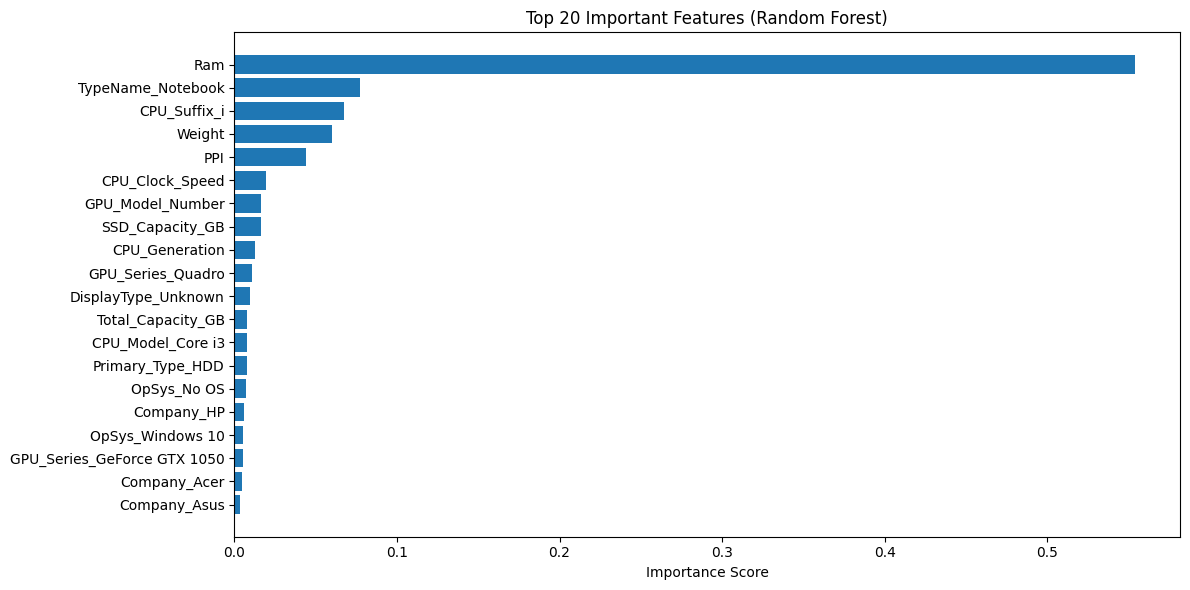

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Compute and display feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Top 10 Important Features:\n", feature_importances.head(10))

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(feature_importances['Feature'].head(20), feature_importances['Importance'].head(20))
plt.gca().invert_yaxis()
plt.xlabel("Importance Score")
plt.title("Top 20 Important Features (Random Forest)")
plt.tight_layout()
plt.show()

# Step 7: (Optional) Drop low-importance features
# important_features = feature_importances[feature_importances['Importance'] > 0.01]['Feature'].tolist()
# X_train_reduced = X_train[important_features]
# X_test_reduced = X_test[important_features]


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

print(X_train.columns)
print(X_test.columns)
# Step 1: Fit the model
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X_train, y_train)

# Step 2: Predict on test set
y_pred = model.predict(X_test)

# Step 3: Evaluate
y_pred=np.expm1(y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score     : {r2:.4f}")
print(f"RMSE         : {rmse:.4f}")


Index(['Ram', 'Weight', 'CPU_Generation', 'CPU_Clock_Speed',
       'GPU_Model_Number', 'Total_Capacity_GB', 'SSD_Capacity_GB',
       'HDD_Capacity_GB', 'Is_Hybrid', 'PPI', 'Company_Acer', 'Company_Apple',
       'Company_Asus', 'Company_Dell', 'Company_HP', 'Company_Lenovo',
       'Company_MSI', 'Company_Rare Companies', 'Company_Razer',
       'Company_Samsung', 'Company_Toshiba', 'TypeName_2 in 1 Convertible',
       'TypeName_Gaming', 'TypeName_Netbook', 'TypeName_Notebook',
       'TypeName_Ultrabook', 'TypeName_Workstation', 'OpSys_Android',
       'OpSys_Chrome OS', 'OpSys_Linux', 'OpSys_Mac OS X', 'OpSys_No OS',
       'OpSys_Windows 10', 'OpSys_Windows 10 S', 'OpSys_Windows 7',
       'OpSys_macOS', 'CPU_Brand_AMD', 'CPU_Brand_Intel',
       'CPU_Brand_Rare_CPU_Brand', 'CPU_Suffix_ASeries', 'CPU_Suffix_GHz',
       'CPU_Suffix_N', 'CPU_Suffix_Rare_CPU_Suffix', 'CPU_Suffix_U',
       'CPU_Suffix_Y', 'CPU_Suffix_i', 'CPU_Suffix_xZ', 'CPU_Model_A6-Series',
       'CPU_Model_A9-

In [ ]:
!pip install catboost
from catboost import CatBoostRegressor
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

model = CatBoostRegressor(verbose=0, random_state=42)
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)

# Evaluate on true price scale
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(f"R² on actual price: {r2:.4f}")
print(f"RMSE on actual price: ₹{rmse:,.2f}")

R² on actual price: 0.8347
RMSE on actual price: ₹243,715,770.97


In [ ]:
#lets train a decision tree regressor and check what happens?
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

model=DecisionTreeRegressor(max_depth=10,min_samples_split=6,min_samples_leaf=3,
    random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
y_pred=np.expm1(y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² Score     : {r2:.4f}")
print(f"RMSE         : {rmse:.4f}")

R² Score     : 0.7288
RMSE         : 19995.2023


In [ ]:
#Lets train a boosting model like xgboost or lightgbm on the test data
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10],
    'learning_rate': [0.05, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
    'reg_alpha': [0, 1],
    'reg_lambda': [1, 5]
}

model= GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='r2', verbose=1, n_jobs=-1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_pred=np.expm1(y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Test RMSE:", rmse)
print("Test R²:", r2)

Fitting 3 folds for each of 288 candidates, totalling 864 fits
Test RMSE: 14912.398460256281
Test R²: 0.849142457651038


In [ ]:
# 2. Can the model accurately predict the prices of laptops from lesser-known brands?
rare_mask = X_test["Company_Rare Companies"] == 1
X_rare = X_test[rare_mask]
y_rare = y_test[rare_mask]
y_pred_rare = model.predict(X_rare)
print(model)
y_pred_rare=np.expm1(y_pred_rare)
r2_rare = r2_score(y_rare, y_pred_rare)
rmse_rare = np.sqrt(mean_squared_error(y_rare, y_pred_rare))

print("R² on Rare Brands:", r2_rare)
print("RMSE on Rare Brands:", rmse_rare)

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
        

In [ ]:
#Q.3)Does Brand of the laptop significantly influence its price?
from scipy.stats import f_oneway

X_Total=pd.concat([X_Train,y_Train],axis=1)
X_Total.dropna(inplace=True)
groups = [X_Total[X_Total['Company'] == brand]['Price'] for brand in X_Total['Company'].unique()]
f_stat, p_val = f_oneway(*groups)
print("p-value:", p_val)  # p < 0.05 means brand has significant effect


p-value: 1.6911895894794326e-25


In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define ranges
high_end_mask = y_test > 100000
budget_mask = y_test < 40000

# Filter data
X_high_end = X_test[high_end_mask]
X_budget = X_test[budget_mask]
y_high_end = y_test[high_end_mask]
y_budget = y_test[budget_mask]

print(model)
# Predict and reverse log transformation (if you applied log1p on target during training)
high_end_preds = model.predict(X_high_end)
budget_preds = model.predict(X_budget)
high_end_preds = np.expm1(high_end_preds)
budget_preds= np.expm1(budget_preds)

# Evaluate
high_end_r2 = r2_score(y_high_end, high_end_preds)
budget_r2 = r2_score(y_budget, budget_preds)

high_end_rmse = np.sqrt(mean_squared_error(y_high_end, high_end_preds))
budget_rmse = np.sqrt(mean_squared_error(y_budget, budget_preds))

high_end_mae = mean_absolute_error(y_high_end, high_end_preds)
budget_mae = mean_absolute_error(y_budget, budget_preds)

# Print results
print("High-end R²:", high_end_r2)
print("Budget R²:", budget_r2)
print("High-end RMSE:", high_end_rmse)
print("Budget RMSE:", budget_rmse)
print("High-end MAE:", high_end_mae)
print("Budget MAE:", budget_mae)



GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
        

In [ ]:
import joblib
print (type(model))
joblib.dump(model, 'model.pkl')

<class 'xgboost.sklearn.XGBRegressor'>


['model.pkl']

In [ ]:
!find . -name model.pkl

./model.pkl


In [ ]:
import joblib
model=joblib.load('model.pkl')
print(type(model))
print(model.predict(X_test[:-1]))

<class 'xgboost.sklearn.XGBRegressor'>
